# Interpretability of neural networks


## Model Explanation
Activiation Maximization : Finding a prototype of each target class.

**TODO** : add more details and example

## Explaining DNN Decisions
**NOTATIONS**

$R_i(\boldsymbol{x})$ = relevance score of pixel $i$ of an image $\boldsymbol{x}$

$f(\boldsymbol{x})$ = unnormalized prediction score ( aka. activation values before softmax layer )


### Sensitivity Analysis
Computing rate of change of output respect to input variables.

```
What makes an image more/less a car?
```
$$
R_i(\boldsymbol{x}) = \frac{\partial f(\boldsymbol{x})}{\partial x_i}
$$
Commonly people use :
$$
R_i(\boldsymbol{x}) = \Big ( \frac{\partial f(\boldsymbol{x})}{\partial x_i} \Big )^2
$$
DOUBT
- Why is it better to use $(..)^2$?
- Does Saliency map use this method?

### Simple Taylor Decomposion
Decomposing $f(\boldsymbol{x})$ as sum of $R_i(\boldsymbol{x})$
$$
f(\boldsymbol{x}) = \sum_{i=1}^{d}{ R_i(\boldsymbol{x}) }  + O(\boldsymbol{x}\boldsymbol{x}^T)
$$
where
$$
R_i(\boldsymbol{x}) = \frac{\partial f(\boldsymbol{x})}{\partial x_i} 
\Bigg |_{\boldsymbol{x} = \boldsymbol{\widetilde{x}}} \cdot ( x_i - \widetilde{x}_i )
$$


#### Derivation of Simple Taylor Decomposion
\begin{align}
f(\boldsymbol{x})  &= f(\boldsymbol{\widetilde{x}}) + \nabla_{\boldsymbol{x}} f(\boldsymbol{x}) 
\big |_{\boldsymbol{x} = \boldsymbol{\widetilde{x}}} \cdot ( \boldsymbol{x} - \boldsymbol{ \widetilde{x} } ) + O(\nabla_{\boldsymbol{x}}^{2} ) + O(\nabla_{\boldsymbol{x}}^{3} ) + ...
\\
&= f(\boldsymbol{\widetilde{x}}) + \sum_{i=1}^{d}{\frac{\partial f(\boldsymbol{x})}{\partial x_i}} \Big |_{x_i = \widetilde{x}_i}  ( x_i - \widetilde{x}_i ) + O(\boldsymbol{x}\boldsymbol{x}^T) \\
&= \sum_{i=1}^{d}{\frac{\partial f(\boldsymbol{x})}{\partial x_i}} \Big |_{x_i = \widetilde{x}_i}  ( x_i - \widetilde{x}_i ) +
O(\boldsymbol{x}\boldsymbol{x}^T)
\tag*{(choose  $\boldsymbol{\widetilde{x}}  \to f(\boldsymbol{\widetilde{x}}) = 0 $  )}
\end{align}

#### ReLU Network without biases
For networks that based on **ReLU** activator: $\textrm{RL}(x) = max(0, x)$,  we can omit $O(\boldsymbol{x}\boldsymbol{x}^T)$ because $$\forall i \ge 2 : \nabla_{\boldsymbol{x}}^{i}f(\boldsymbol{x}) = 0 $$
and $\boldsymbol{\widetilde{x}}$ can be found by :
$$
\boldsymbol{\widetilde{x}} = \lim_{\epsilon \to 0} \epsilon \boldsymbol{x} \tag*{DOUBT : what does this mean?}
$$

$$
\lim_{\epsilon \to 0} f(\epsilon \boldsymbol{x}) = \lim_{\epsilon \to 0} \epsilon f(\boldsymbol{x})
$$

As a result, 
$$
f(\boldsymbol{x}) = \sum_{i=1}^{d} R_i({\boldsymbol{x}})
$$
and the relevance score is :
\begin{align}
R_i(\boldsymbol{x}) 
&= \frac{\partial f(\boldsymbol{x})}{\partial x_i} 
\Bigg |_{\boldsymbol{x} = \boldsymbol{\widetilde{x}}} \cdot ( x_i - \widetilde{x}_i )  \\
&= \frac{\partial f(\boldsymbol{x}) }{\partial x_i } x_i \tag*{DOUBT : how?}
\end{align}
where $ \frac{\partial f(\boldsymbol{x}) }{\partial x_i } $ is sensivity and $x_i$ is saliency of input value


Deriavation of $R_i(\boldsymbol{x})$

\begin{align}
f'(\widetilde{x}) &= \lim_{ h \to 0} \frac{ f( \widetilde{x}+ h ) - f(\widetilde{x})}{h} \\ 
&= \lim_{ h \to 0} \frac{ f( cx+ h ) - f(cx)}{h} \tag*{($\widetilde{x} = \lim_{\epsilon \to 0} \epsilon x = cx$)} \\
&= \lim_{ h \to 0} \frac{ cf(x+ h/c) - cf(x)}{h} \tag*{(ReLU property)} \\
&= c\lim_{ h \to 0} \frac{ f(x+ h/c) - f(x)}{h} \\
&= c\lim_{ h \to 0} \frac{ f(x+ h/c) - f(x)}{h} \cdot \frac{c}{c} \\
&= c\lim_{ h \to 0} \frac{ f(x+ h/c) - f(x)}{h/c} \cdot \frac{1}{c} \\
&= f'(x)
\end{align}
Thus,

\begin{align}
\frac{\partial f(\boldsymbol{x})}{\partial x_i} 
\Bigg |_{\boldsymbol{x} = \boldsymbol{\widetilde{x}}}  = \frac{\partial f(\boldsymbol{x})}{\partial x_i}
\end{align}


### Relevance Propagation
- Exploit feed-forward graph of the model. Redistributing prediction score back until input pixels.
- Redistribution rule must satisfy **relevance conservation** priniciple ( aka no enery loss during the process )

**NOTATION**
- $R_{j \leftarrow k }$ is relevance score propagated from neuron $k$ to $j$ where $k$ in layer **i-th** and $j$ is in **(i-1)-th**

To satisfy  **relevance conservation**, we need :

- $\sum_{j} R_{j \leftarrow k} = R_k$
- $R_j = \sum_{k} R_{j \leftarrow k}$

Putting these constraints together we have :
\begin{align}
f(x) &= \sum_{k} R_{k} 
= \sum_{k} \sum_{j} R_{j \leftarrow k} 
= \sum_{j} \sum_{k} R_{j \leftarrow k} 
= \sum_{j} R_{j} 
= \cdots  = \sum_{i=1}^{d} R_i
\end{align}

Advantages of decomposition method: ( From "Methods for ..." section 4.4)
- DOUBT : if the number of input variables  is limited, the analysis can be represented as a pie chart, histogram
- Pooling. For example, relevance scores of RBG channels can be aggregated and represented as the score of that pixel.
- Filtering

#### Layer-wise Relevance Propagation

##### Derivation of 1 Level ReLU network
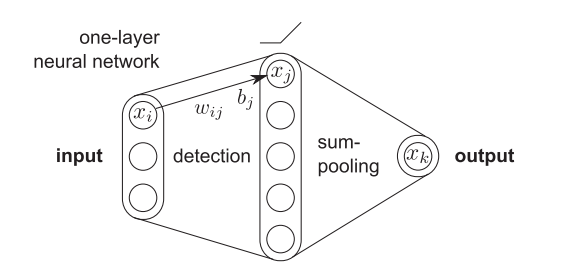
Activation at each layer defined :
- $x_j = max(0, \sum_i{w_{ij}x_i + b_j})$ 
- $x_k = \sum_j{x_j}$


From the defination, we can find

$$R_k = \sum_j x_j $$

Decomposition of $R_k$:
\begin{align}
R_k = \sum_{j} \underbrace{ \frac{ \partial R_k } { \partial x_j } \bigg |_{ \{ \widetilde{x}_j \} } ( x_j - \widetilde{x}_j ) }_{R_{j \leftarrow k }}
\end{align}

Decomposition of $R_j$ :
\begin{align}
R_j &= \sum_{k} R_{j \leftarrow k} \\
&= \sum_{k} \frac{ \partial R_k } { \partial x_j } \bigg |_{ \{ \widetilde{x}_j \} } ( x_j - \widetilde{x}_j )  \\
&= \frac{ \partial R_k } { \partial x_j } \bigg |_{ \{ \widetilde{x}_j \} } ( x_j - \widetilde{x}_j ) 
\tag*{(this example has k=1)}
\end{align}

The root point $\widetilde{x}_j$ should satisfy these constraints :
- $\sum_j { \widetilde{x}_j }  = 0 $
- $\forall_j : { \widetilde{x}_j } \ge 0$ because the activation function is $max(0,\cdot)$.

This suggests that $\{ \widetilde{x}_j \} = 0$, hence $R_j = x_j$

TODO : show conservation and positive property


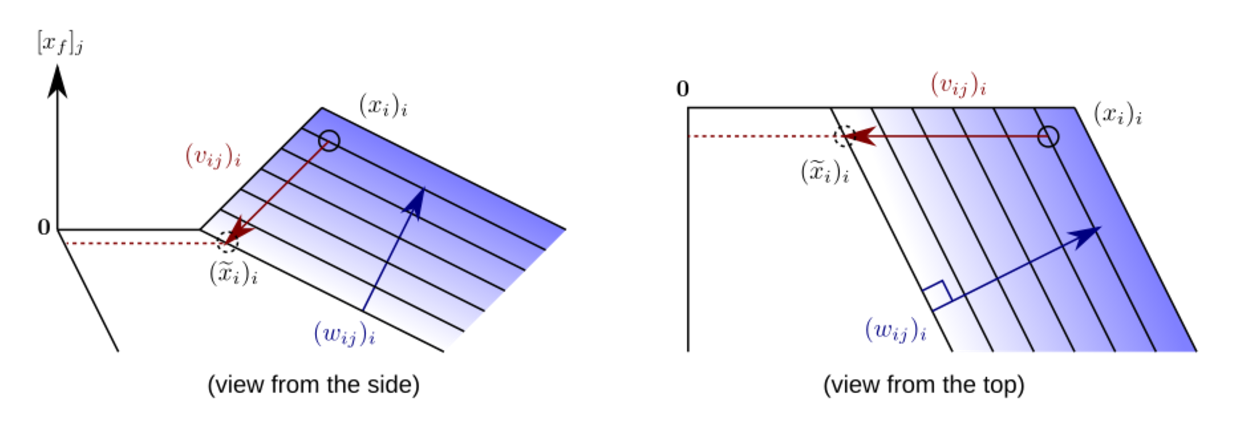
Question : What are root point and search direction?

Answer: 
Root point is the point that $R=0$ and search direction is the direction from ${x_i}$ leading to the root point


#### Deep Taylor Decomposition

Consider $R_j = max(0, \sum_i{ x_i w_{ij} + b_j})$ where $b_j < 0$

A root point $\{\widetilde{x}_i\}^{(j)}$ can be found by : 
$$
\{\widetilde{x}_i\}^{(j)} = \{x_i\} + t\{v_i\}^{(j)}
$$

From $R_j$ definition,

if $R_j = 0$, $\{\widetilde{x}_i\}^{(j)} = \{x_i\}$
otherwise, $\{\widetilde{x}_i\}$ can be found at the intersection between these 2 equations:
\begin{align*}
\sum_i{ x_i w_{ij} + b_j} &= 0 \tag*{(from $R_j$ definition)}\\
\{\widetilde{x}_i\}^{(j)} &= \{x_i\} + t\{v_i\}^{(j)} \tag*{(Search direction)}
\end{align*}

Solving for $t$, we have

$$
t = -\frac{ \sum_i{ x_i w_{ij} + b_j } }{ \sum_i{ v_i^{(j)}w_{ij} } }
$$

Thus, 
\begin{align*}
x_i - \widetilde{x}_i^{(j)} &= \frac{ \sum_i{ x_i w_{ij} + b_j } }{ \sum_i{ v_i^{(j)}w_{ij} } } v_i^{(j)} \\
&= \frac{ v_i^{(j)} R_j }{ \sum_i{ v_i^{(j)}w_{ij} } }
\end{align*}

From decompition of $R_i$, we have :
\begin{align*}
R_i &= \sum_j{ \frac{ \partial R_j  }{ \partial x_i } } \bigg |_{ \{ \widetilde{x}_i\}^{(j)} } \cdot  ( x_i - \widetilde{x}_i^{(j)} ) \\
&= \sum_j{ w_{ij}  ( x_i - \widetilde{x}_i^{(j)} ) } \\
&= \sum_j{ w_{ij}  \frac{ v_i^{(j)} R_j }{ \sum_i{ v_i^{(j)}w_{ij} } } } \\
R_i &= \sum_j{   \frac{ v_i^{(j)}  w_{ij} R_j }{ \sum_i{ v_i^{(j)}w_{ij} } } } \tag*{(General equation for $R_i$)}
\end{align*}

The direction $v_i^{(j)}$  is depend on input space $\{x_i\}$.

$w^2$**-Rule**

For $\{x_i\} \in R^d$, the root point is the one that is closest to $\{x_i\}$ in Euclidean space. Thus, we need to search on a line that contain $\{x_i\}$ and direction corresponding to $\nabla_{\boldsymbol{x_i}} R_j$.  Thus, $v_i^{(j)} = w_{ij}$
$$
R_i = \sum_j{   \frac{ w_{ij}^2 }{ \sum_i{ w_{ij}^2 } } } R_j
$$

**Vector Notation**

Given $\boldsymbol{X} \in \mathbb{R}^{\gamma}, \boldsymbol{W} \in \mathbb{R}^{\gamma,\beta} $ and $\boldsymbol{R}_{j} \in \mathbb{R}^{\beta}$.

\begin{align*}
\boldsymbol{V} &= \boldsymbol{W} \odot \boldsymbol{W} \\
\boldsymbol{R}_{i} &= \boldsymbol{V}\cdot \bigg( \boldsymbol{R}_j \oslash \bigg( \boldsymbol{V}^T \cdot [\mathbb{1}]_\gamma \bigg)\bigg) \\
\end{align*}
where $\odot, \oslash$ denote element-wise multiplication and division respectively and $[\mathbb{1}]_\gamma$ is a vector with $\gamma$ entries.

$z$**-Rule**

For this rule, we find the root point on the segment $( \boldsymbol{0}, \{x_i\} )$. Therefore, the root point is at $\boldsymbol{0}$ because 
\begin{align*}
R_j(\boldsymbol{0}) &= \max(0, \sum_i 0w_{ij} + b_j) \\
&= 0 \tag*{($b_j < 0 $ by definition)}
\end{align*}
Therefore, $v_i^{(j)} = x_{i}$. 

Hence
\begin{align*}
R_i &= \sum_j{   \frac{ w_{ij}x_i }{ \sum_i{ w_{ij}x_i } } } R_j \\
&= \sum_j{   \frac{ z_{ij} }{ \sum_i{ z_{ij} } } } R_j  \tag*{($z_{ij} = w_{ij}x_i$)}
\end{align*}

**Vector Notation**

Given $\boldsymbol{X} \in \mathbb{R}^{\gamma}, \boldsymbol{W} \in \mathbb{R}^{\gamma,\beta} $ and $\boldsymbol{R}_{j} \in \mathbb{R}^{\beta}$.

$$
\boldsymbol{R}_{i} = \boldsymbol{X} \odot \bigg( \boldsymbol{W} \cdot \bigg(\boldsymbol{R}_{j} \oslash \bigg( (\boldsymbol{W})^T \boldsymbol{X}\bigg) \bigg)\bigg)
$$

<!--
where $\odot, \oslash$ denote element-wise multiplication and division respectively
-->

$z^+$**-Rule**

The closest root point can be found on the line segment is $( \{ x_i 1_{w_{ij} < 0 } \} , \{ x_i \})$. For $\{ x_i \} \in R_+^d$, this line segment is also in $R_+^d$. The root point is at the first extremity:

\begin{align*}
R_j(\{ x_i 1_{w_{ij} < 0 }\}) &= max(0, \sum_i x_i 1_{w_{ij} < 0 } w_{ij} + b_j) \\
&= max(0, \sum_i x_i w_{ij}^- + b_j) \\
&= 0 \tag*{($x_i \ge 0, b_j < 0$)}
\end{align*}
Thus,
\begin{align*}
v_i^{(j)} &= x_i - x_i 1_{w_{ij} < 0 } \\
&= x_i1_{w_{ij} \ge 0 }
\end{align*}

Therefore,
\begin{align*}
R_i &= \sum_j{   \frac{ w_{ij}x_i1_{w_{ij} \ge 0 } }{ \sum_i{ w_{ij}x_i1_{w_{ij} \ge 0 } } } } R_j \\
&= \sum_j{   \frac{ w_{ij}^+x_i }{ \sum_i{ w_{ij}^+x_i } } } R_j \\
&= \sum_j{   \frac{ z_{ij}^+ }{ \sum_i{ z_{ij}^+ } } } R_j \\
\end{align*}

**Vector Notation**

Given $\boldsymbol{X} \in \mathbb{R}^{\gamma}, \boldsymbol{W} \in \mathbb{R}^{\gamma,\beta} $ and $\boldsymbol{R}_{j} \in \mathbb{R}^{\beta}$.

$$\boldsymbol{R}_{i} = \boldsymbol{X} \odot \bigg( \boldsymbol{W}^+ \cdot \bigg(\boldsymbol{R}_{j} \oslash \bigg( (\boldsymbol{W}^+)^T \boldsymbol{X}\bigg) \bigg)\bigg)$$

$z^\mathcal{B}$**-Rule**

The closest root point is on the segment $( \{ l_i 1_{w_{ij}>0 } + h_i 1_{w_{ij}< 0} \}, \{ x_i \})$. With this segment, if $\{ x_i \} \in \mathcal{B}$, the segment is also in $\mathcal{B}$. The root point is at the first extremity,

\begin{align*}
R_j(\{ l_i 1_{w_{ij}>0 } + h_i 1_{w_{ij}< 0} \})  &= max(0, \sum_i (( l_i 1_{w_{ij}>0 } + h_i 1_{w_{ij}< 0}) w_ij + b_j ) \\
&=  max(0, \sum_i ( l_i w_{ij}^+  + h_i w_{ij}^- + b_j ) \\
&= 0
\end{align*}
Because $l_i < 0$ and $h_i > 0$ and $b_j < 0$

Therefore, 
\begin{align*}
v_i^{(j)} &= x_i - l_i 1_{w_{ij}>0 }  - h_i 1_{w_{ij}< 0} \\
\end{align*}

Hence,
\begin{align*}
R_i &= \sum_j{   \frac{ w_{ij} (x_i - l_i 1_{w_{ij}>0 }  - h_i 1_{w_{ij}< 0}) }{ \sum_i{ w_{ij}  (x_i - l_i 1_{w_{ij}>0 } - h_i 1_{w_{ij}< 0}) } } } R_j \\
&= \sum_j{  \frac{ z_{ij} - l_i w_{ij}^+ - h_i w_{ij}^- }{\sum_i{ z_{ij} - l_i w_{ij}^+ - h_i w_{ij}^-} } } R_j
\tag*{ ($w_{ij}^ + = w_{ij}\mathbb{1}_{w_{ij} > 0 }, $ same as $w_{ij}^-$) }
\end{align*}

**Vector Notation**

Given $\boldsymbol{X} \in \mathbb{R}^{\gamma}, \boldsymbol{W} \in \mathbb{R}^{\gamma,\beta} $ and $\boldsymbol{R}_{j} \in \mathbb{R}^{\beta}$ and $\boldsymbol{L}$ and $\boldsymbol{H}$ are lowerbound and upperbound.

\begin{align*}
\boldsymbol{U} &= \boldsymbol{W}^- \\
\boldsymbol{V} &= \boldsymbol{W}^+ \\
\boldsymbol{N} &= \boldsymbol{R}_j \oslash \bigg( \boldsymbol{W}^T\boldsymbol{X} - \boldsymbol{V}^T\boldsymbol{L} - \boldsymbol{U}^T\boldsymbol{H} \bigg) \\
\boldsymbol{R}_i &= \boldsymbol{X}\odot(\boldsymbol{W}\cdot\boldsymbol{N}) - \boldsymbol{L}\odot(\boldsymbol{V}\cdot\boldsymbol{N}) - \boldsymbol{H}\odot(\boldsymbol{U}\cdot\boldsymbol{N})
\end{align*}

#### Other methods that exploit network structure but don't use decomposition:
- TODO: deconvolution 
- TODO: guided back-prop

# Timeline

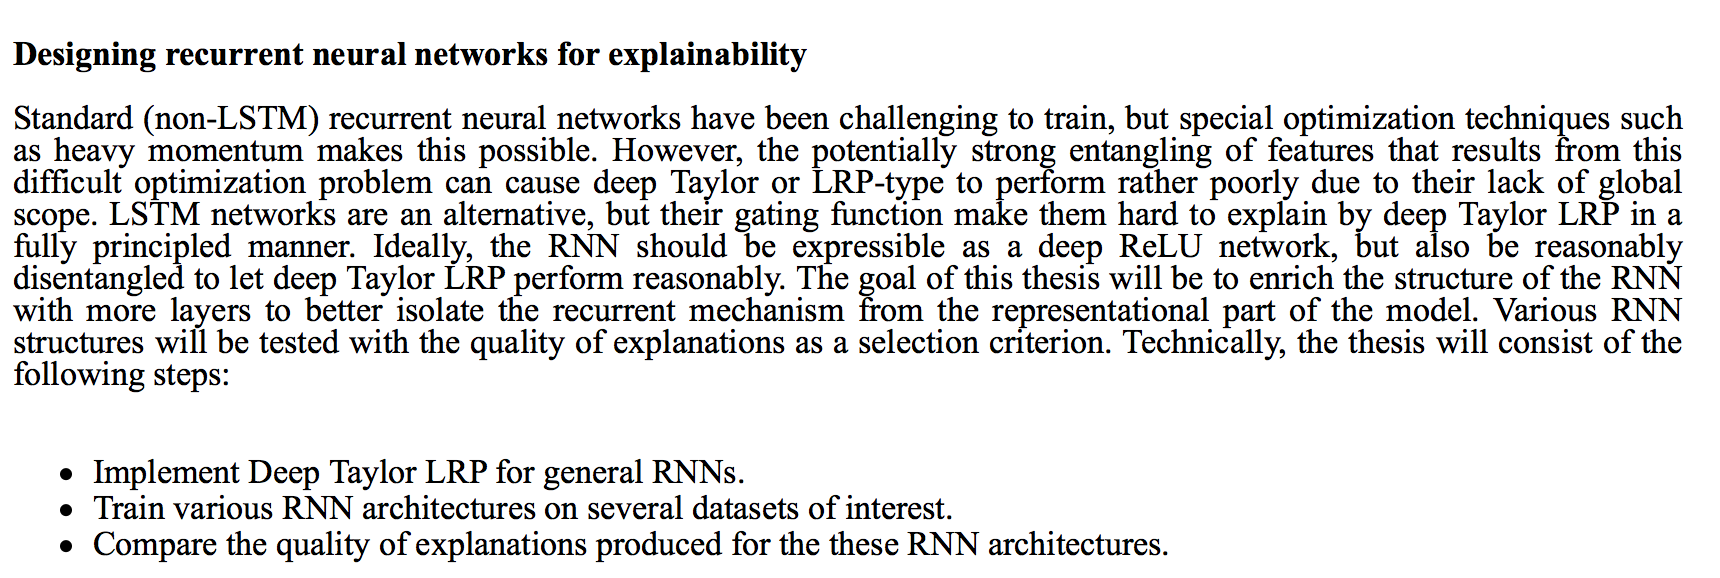


## Sprint 1
- ~~Study "What is Relevant in a Text Document?": An Interpretable Machine Learning Approach"~~
- Can we apply this technique to [adversial attack](https://www.kaggle.com/c/nips-2017-non-targeted-adversarial-attack)?
    - it's better to use a direct method to win this challenge.

## Sprint 2

- Questions
    - is gradprop method gradient w.r.t X( sensitivity) not W?
    - Method for explaining ... paper page 8 : method (4), (6) convolutional layer ?
    - What is relevant in a text document?
        - using different 'K' for evaluating EPI
    
### Experiments

#### Classify Text Document
Similar to "What is Relevant in a Text Document" but with RNNs

**Evaluations**
- accuracy
- Explanation Power Index

**Dataset**
- [20Newsgroups](http://qwone.com/~jason/20Newsgroups/) data with space between words removed.


#### Audio Scence Classification

**Dataset**
- [LITIS Rouen Audio scene dataset](https://sites.google.com/site/alainrakotomamonjy/home/audio-scene)

**Relevant Paper**
- [Audio Scene Classification with Deep Recurrent Neural Networks](https://arxiv.org/abs/1703.04770)

#### Word Tokenizer
** Goal ** Train RNN to tokenize text into list of words. This is useful for languages that don't use space to separate between 2 words, such as Thai.
Example
```
Thai
---
วันนี้วันพฤหัส -> วันนี้|วัน|พฤหัส

Eng
---
todayisthursday ->  today|is|thrusday

```

**Evaluations**
- accuracy 

**Dataset**
- [20Newsgroups](http://qwone.com/~jason/20Newsgroups/) data with space between words removed.

**Remarks**
- Context that the model use to decide whether it should put a separator is quite short, as a result propagrated relevance might not be visible.
